<a href="https://colab.research.google.com/github/Mlamalerie/Test_DeepLearning/blob/main/TEST_DEEP_LEARNING_Mlamali_SAID_SALIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEST DEEP LEARNING


## Question 1 :

**Décrivez un pipeline de détection de langage abusif sur un réseau social. Vous pouvez utiliser des schémas.**

La détection du langage abusif est une tâche complexe qui doit s'adapter à différentes formes de discours et de langage. Pour ce faire, nous avons besoin d'une base de données de ce réseau social, ou alors nous pouvons faire du webscraping sur celui-ci en se basant sur des mot clé ou des hashtag pour trouver les messages les plus pertinents pour notre problème.

On a ici un problème de classification binaire de texte issue de domaine du NLP (Natural Language Processing)

- Tout d'abord, nous avons une phase d'extraction de données. Celle-ci peut être fait par un ETL (Extract-transform-load) pour les bases de données ou du scraping de page web du réseau social.
- Après vient une phase de prétraitement, ou on va apporter des modifications aux données afin de tirer que les informations les plus importantes. D'ailleurs, généralement, ces traitements sont très gourmands en calcul, c'est pour cela que des jobs spark ou des fonctions Lambda (AWS) sont utilisés sur des clusters et donc tirer profit de la parallélisation. Cette partie est très importante. Elle nous permettra d'avoir un bon corpus de données et ainsi avoir une bonne phase d'extraction de données, où on aura une représentation vectorielle de nos données.
- Ensuite ces données seront utilisée pour la création d'un modèle prédictif ayant pour but de détecter le contenu abusif en classification binaire 0 ou 1.

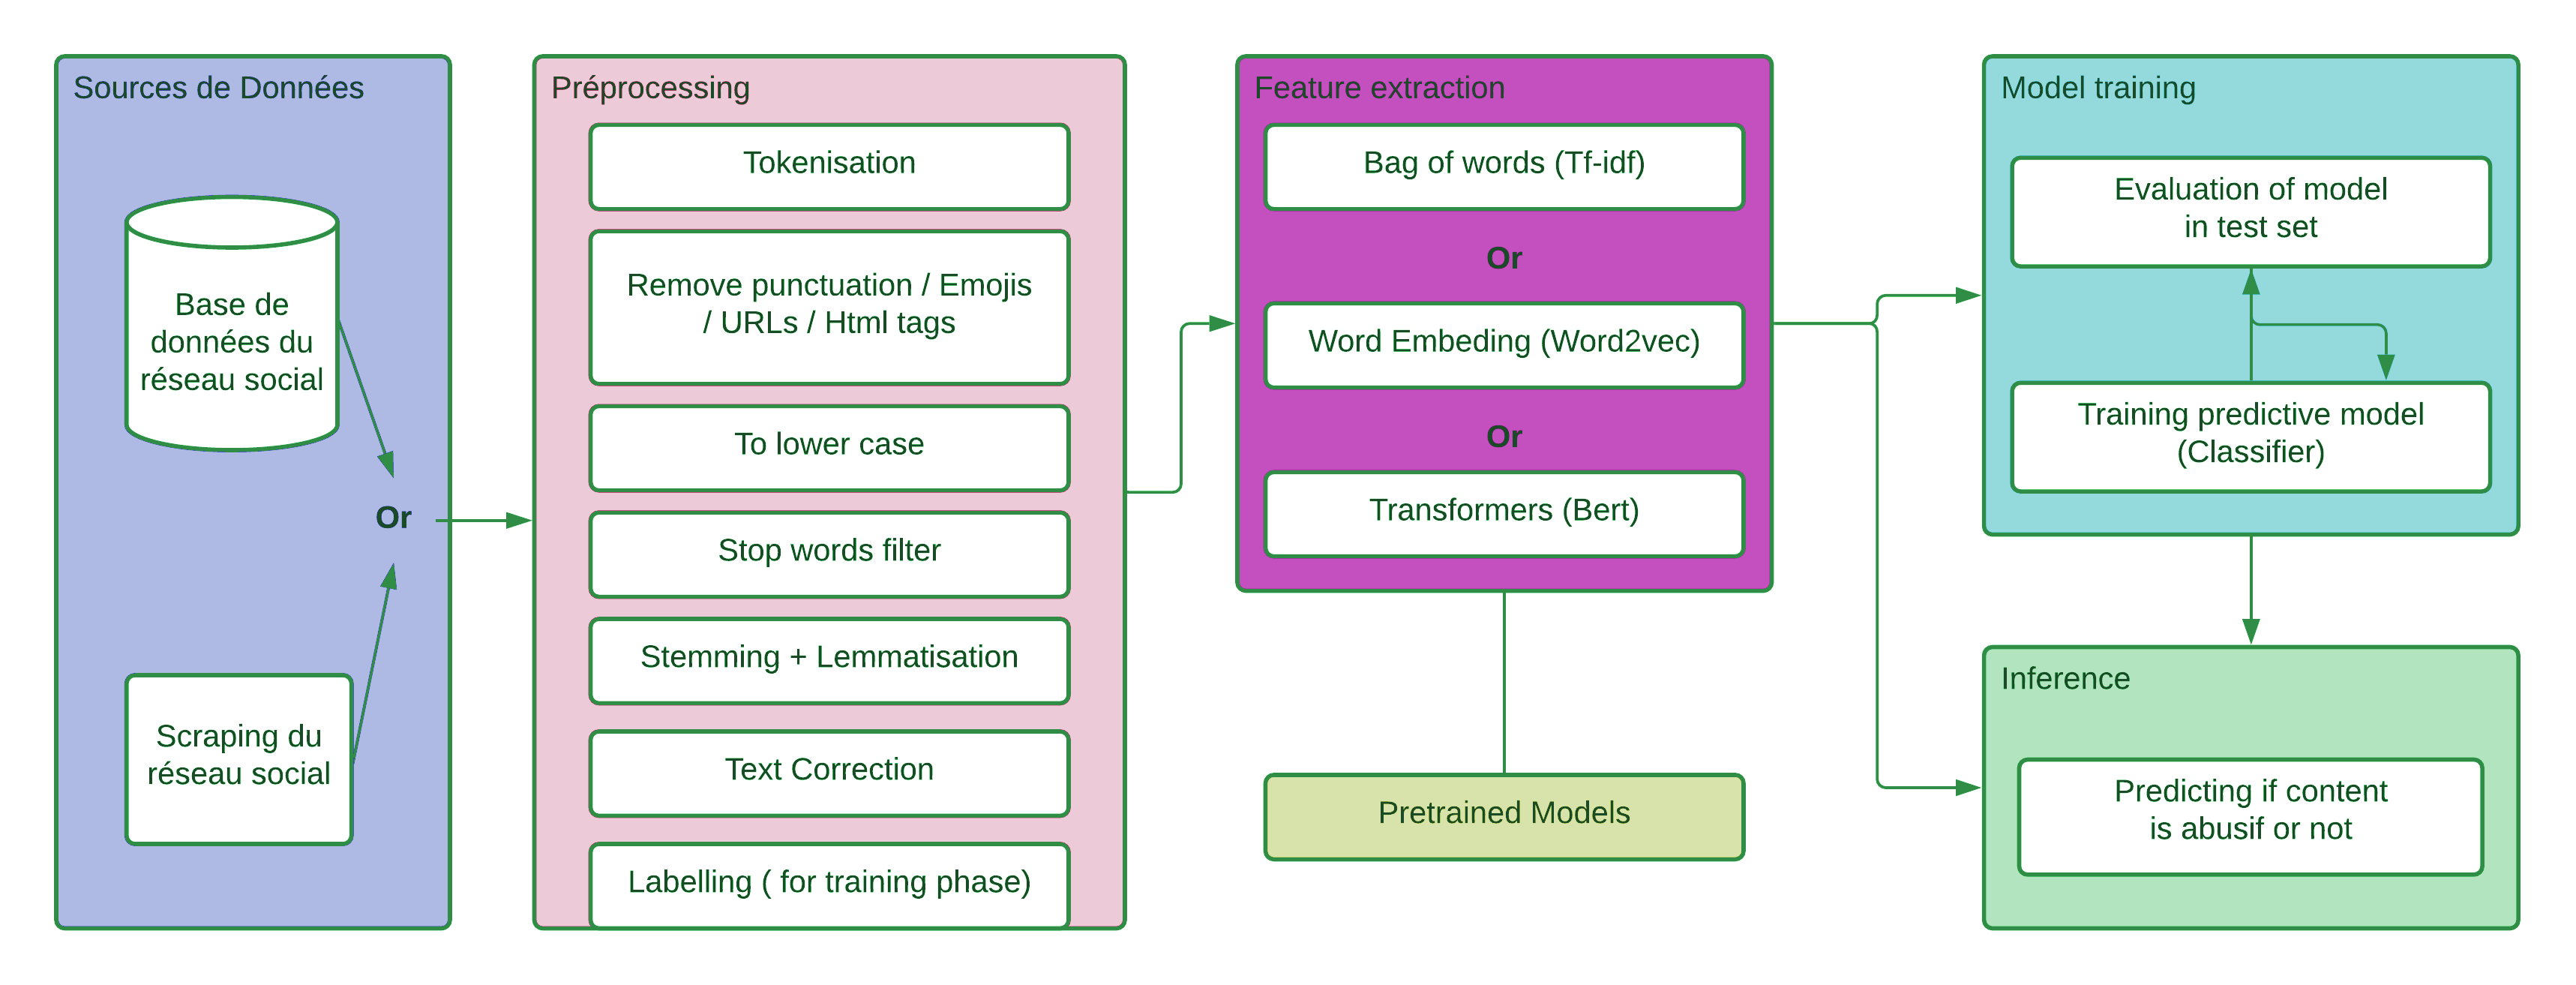

## Question 2 :

**Expliquez le processus permettant d’utiliser un algorithme hybride CNN-LSTM pour détecter un contenu agressif dans une publication.**

L'objectif est de détecter les termes agressif contenu dans une publication donnée. Ce qui rend cette tache difficile, c'est le vocabulaire varié, et des contextes différent et lié.

C'est pour cela on peut utiliser une architecture hybride **CNN-LSTM**:

- Dans un premier temps le modèle aura en entrée les séquences de texte, ainsi que leur label (contenu agressif ou pas). 
- Ensuite vient une couche de *Word-Embbeding* qui aura comme input une matrice de séquence de texte qui vont être représenté sous forme de vecteur (wod2vec). 
- Juste après viendra un couche *CNN* qui va être utilisé comme features extractor. Il aura pour mission d'extraire les informations locale en utilisant des filtres 1D + du Pooling dans le but de réduire la complexité et la taille des données.
- Les sorties du CNN (feature vector) seront envoyés comme entrée au *LSTM*. Ce dernier va les utiliser, avec l'historique, afin de trouver le contexte du texte.
- Enfin s'ajoute une couche de *fully connected* (dense) et un softmax ou sigmoid, qui aura pour but de classifier la séquence de textes en entrée. :)

## Question 3

**Implémentez en utilisant python3 un connecteur Facebook et/ou Instagram permettant de colleter des postes (image, texte et commentaires liés aux images) par rapport à un sujet défini, exemple « le décès du président Jacques Chirac ». Il est recommandé de stocker les textes et les images dans une base MongoDB. Le but de cette question est d’évaluer la qualité de votre code source.**

### 1) Collecte des postes

Selenium + BeautifulSoup

In [1]:
import requests
from time import sleep
import urllib.request
import os

In [ ]:
# Primeros pasos con Selenium en Google Colab de la academia https://scraping.link/
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wdriver = webdriver.Chrome('chromedriver',options=options)

### 2) Stockage des textes et des images

MongoDB

In [ ]:
import pymongo
from pymongo import MongoClient

In [ ]:
#MongoDB connection
URL_CLIENT_MONGODB = ""
client = pymongo.MongoClient(URL_CLIENT_MONGODB)
db = client["facebook"]
mycol = db["posts"]

# Insert the list of publications (list of dicts)
mycol.insert_many(pubs)

In [ ]:
#Show a sample 
mycol.find_one()